In [2]:
import numpy as np # array
import pandas as pd # dataframes
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data Collection & Analysis

In [3]:
# load data 
costumer_data = pd.read_csv('Mall_Customers.csv')

In [5]:
costumer_data.shape

(200, 5)

In [6]:
costumer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
costumer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
costumer_data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      CustomerID  Gender    Age  Annual Income (k$)  Spending Score (1-100)
0         False   False  False               False                   False
1         False   False  False               False                   False
2         False   False  False               False                   False
3         False   False  False               False                   False
4         False   False  False               False                   False
..          ...     ...    ...                 ...                     ...
195       False   False  False               False                   False
196       False   False  False               False                   False
197       False   False  False               False                   False
198       False   False  False               False                   False
199       False   False  False               False                   False

[200 rows x 5 columns]>

In [10]:
costumer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
# choosing Annual Income (k$)	Spending Score (1-100) column

X= costumer_data.iloc[:,[3,4]].values

In [20]:
#finding cluster
wscc=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X)
    
    wscc.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
np.array(wscc)

array([269981.28      , 181363.5959596 , 106348.37306211,  73679.78903949,
        44448.45544793,  37233.81451071,  30259.65720729,  25011.83934916,
        21850.16528259,  19672.07284901])

Text(0.5, 1.0, 'elbow graph')

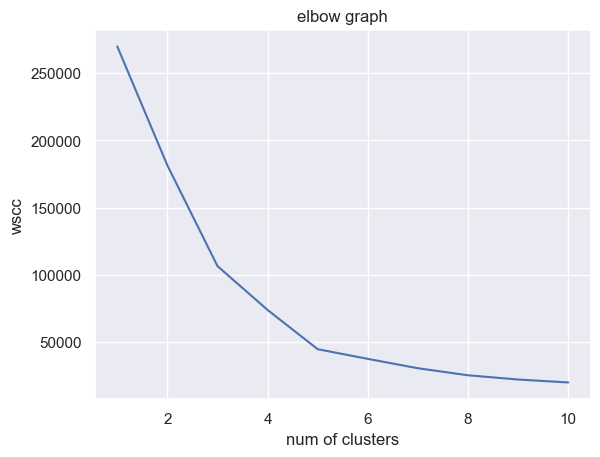

In [30]:
# plot elbow graph 

sns.set()
plt.plot(range(1,11),wscc)
plt.ylabel('wscc')
plt.xlabel('num of clusters')
plt.title('elbow graph')

## optimum cluster = 5


### train k-means model

In [31]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# 5 Clusters - 0, 1, 2, 3, 4

### Visualizing all the Clusters

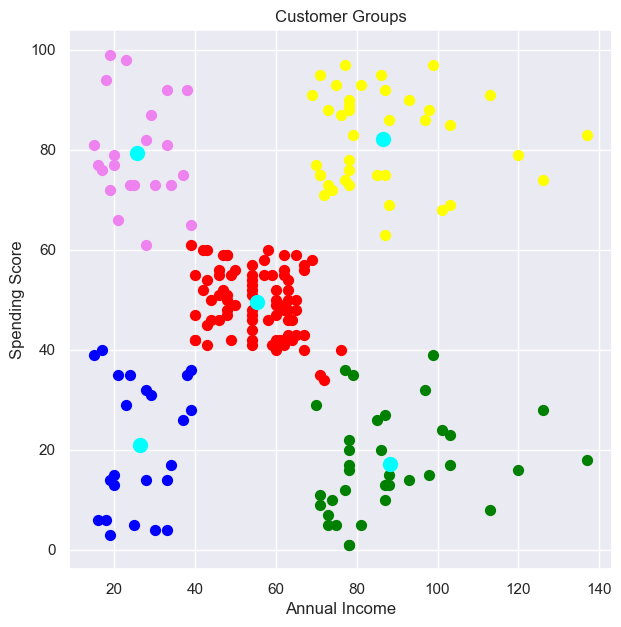

In [37]:
plt.figure(figsize=(7,7))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()